In [68]:
#Lag en modell som predikerer tilsvarende NAND-operatoren.
#Visualiser resultatet etter optimaliseringen av modellen.

In [69]:
import torch as torch
import matplotlib.pyplot as plt
import numpy as np

In [70]:
x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]).reshape(-1, 2)
y_train = torch.tensor([[1.0], [1.0], [1.0], [0.0]]).reshape(-1, 1)

In [71]:
class NOToperator:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[0.0], [0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

        # Predictor
    def f(self, x1, x2):
        return torch.sigmoid((x1 @ self.W[0]) + (x2 @ self.W[1]) + self.b)

        # Logits
    def logits(self, x1, x2):
        return ((x1 @ self.W[0]) + (x2 @ self.W[1]) + self.b).reshape(-1, 1)

    # Uses Cross Entropy
    def loss(self, x1, x2, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x1, x2), y)

model = NOToperator()

In [72]:
optimizer = torch.optim.SGD([model.b, model.W, model.W], 0.1)
for epoch in range(10000):
    model.loss(x_train[:, 0].reshape(-1, 1),
               x_train[:, 1].reshape(-1, 1),
               y_train).backward()  # Compute loss gradients
    optimizer.step()    # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step

C:\Users\Morten\anaconda3\lib\site-packages\torch\optim\sgd.py:69: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/issues/40967 for more information
  super(SGD, self).__init__(params, defaults)


TypeError: f() takes 2 positional arguments but 3 were given

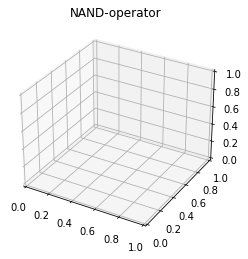

In [73]:
    fig = plt.figure('Oppgave B')
    plot = fig.add_subplot(111, projection='3d')
    plt.title('NAND-operator')

    # Hva gjør denne plottinga? Aner ikke
    x1_grid, x2_grid = np.meshgrid(
        np.linspace(-0.25, 1.25, 10), np.linspace(-0.25, 1.25, 10))
    y_grid = np.empty([10, 10], dtype=np.double)
    for i in range(0, x1_grid.shape[0]):
        for j in range(0, x1_grid.shape[1]):
            tenseX = torch.tensor(float(x1_grid[i, j])).reshape(-1, 1)
            tenseY = torch.tensor(float(x2_grid[i, j])).reshape(-1, 1)
            y_grid[i, j] = model.f(tenseX, tenseY)
    plot_f = plot.plot_wireframe(x1_grid, x2_grid, y_grid, color="green")

    plot.plot(x1_train.squeeze(),
              x2_train.squeeze(),
              y_train.squeeze(),
              'o',
              color="blue")

    plot.set_xlabel("$x_1$")
    plot.set_ylabel("$x_2$")
    plot.set_zlabel("$y$")
    plot.set_xticks([0, 1])
    plot.set_yticks([0, 1])
    plot.set_zticks([0, 1])
    plot.set_xlim(-0.25, 1.25)
    plot.set_ylim(-0.25, 1.25)
    plot.set_zlim(-0.25, 1.25)

    table = plt.table(cellText=[[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0]],
                      colWidths=[0.1] * 3,
                      colLabels=["$x_1$", "$x_2$", "$f(x)$"],
                      cellLoc="center",
                      loc="lower right")
    plt.show()

In [ ]:
torch.logical_not(torch.logical_and(x1_train,x2_train))


tensor([[ True],
        [ True],
        [ True],
        [False]])